**Practical-6**

**Aim: Apply Decision Trees – ID3, C4.5 classification on dataset given below (use sklearn). Evaluate the results using different 
parameters. Dataset: 
https://www.kaggle.com/code/shikhnu/decision-tree-iri-
datast **


===== ID3 (Entropy) =====
Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



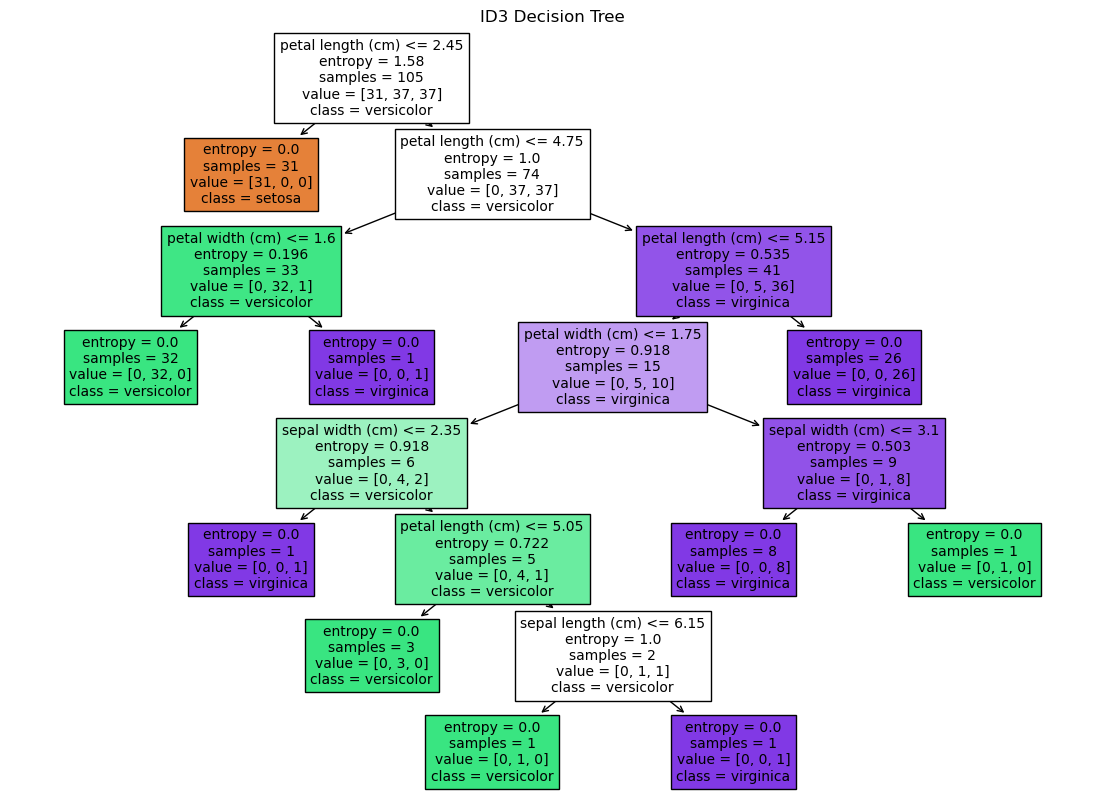

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#ID3 
id3 = DecisionTreeClassifier(criterion="entropy", random_state=42)
id3.fit(X_train, y_train)
id3_pred = id3.predict(X_test)

print("\n===== ID3 (Entropy) =====")
print("Accuracy:", accuracy_score(y_test, id3_pred))
print(classification_report(y_test, id3_pred))

# Plot ID3 tree
plt.figure(figsize=(14, 10))
plot_tree(
    id3,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=10
)
plt.title("ID3 Decision Tree")
plt.show()


===== CART (Gini) =====
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



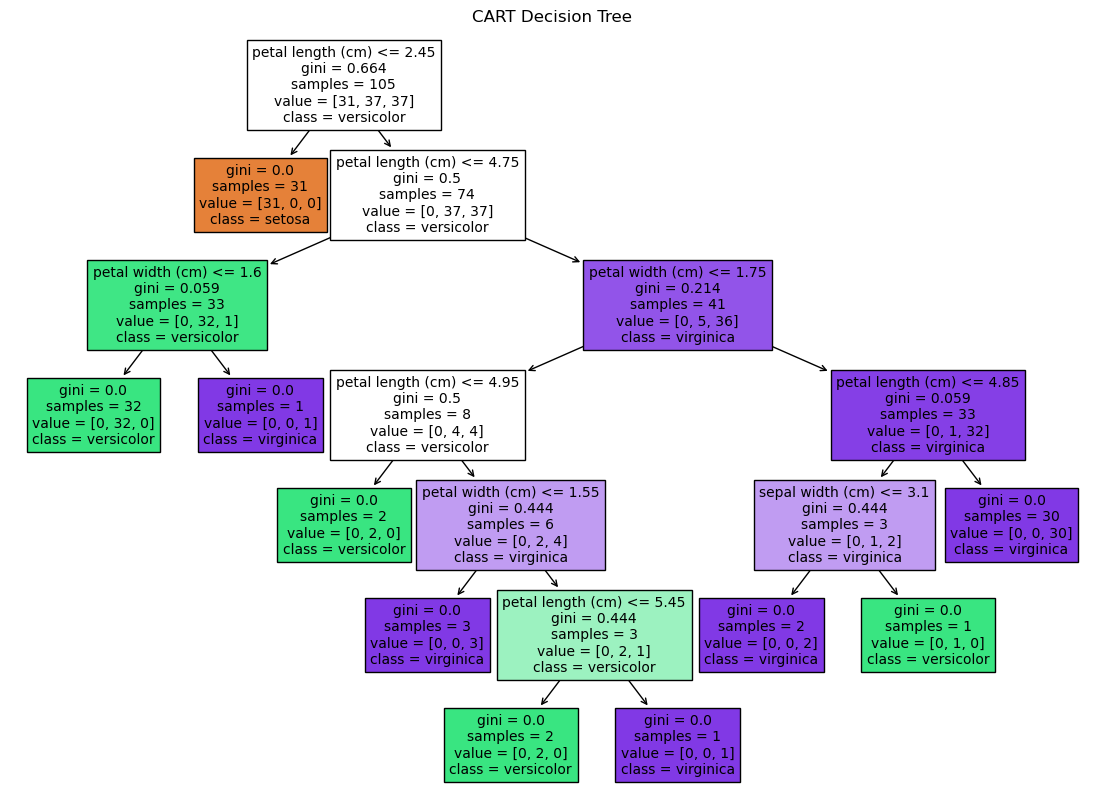

In [21]:
#CART
cart = DecisionTreeClassifier(criterion="gini", random_state=42)
cart.fit(X_train, y_train)
cart_pred = cart.predict(X_test)

print("\n===== CART (Gini) =====")
print("Accuracy:", accuracy_score(y_test, cart_pred))
print(classification_report(y_test, cart_pred))

# Plot CART tree
plt.figure(figsize=(14, 10))
plot_tree(
    cart,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=10
)
plt.title("CART Decision Tree")
plt.show()



===== C4.5-like (Entropy + Pruning) =====
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



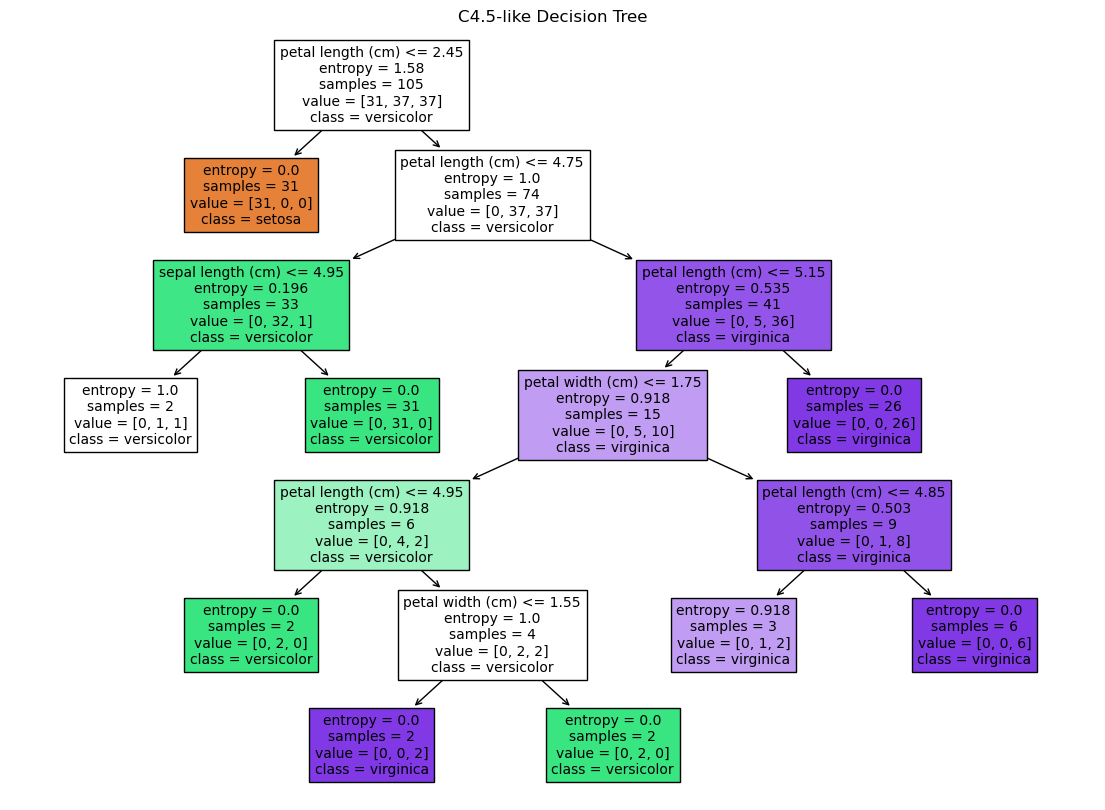

In [22]:
# C4.5
c45 = DecisionTreeClassifier(
    criterion="entropy",
    min_samples_leaf=2,   # simple pruning
    random_state=42
)
c45.fit(X_train, y_train)
c45_pred = c45.predict(X_test)

print("\n===== C4.5-like (Entropy + Pruning) =====")
print("Accuracy:", accuracy_score(y_test, c45_pred))
print(classification_report(y_test, c45_pred))

# Plot C4.5-like tree
plt.figure(figsize=(14, 10))
plot_tree(
    c45,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=10
)
plt.title("C4.5-like Decision Tree")
plt.show()

Accuracy before pruning: 1.0
Best ccp_alpha: 0.0
Accuracy after pruning: 1.0


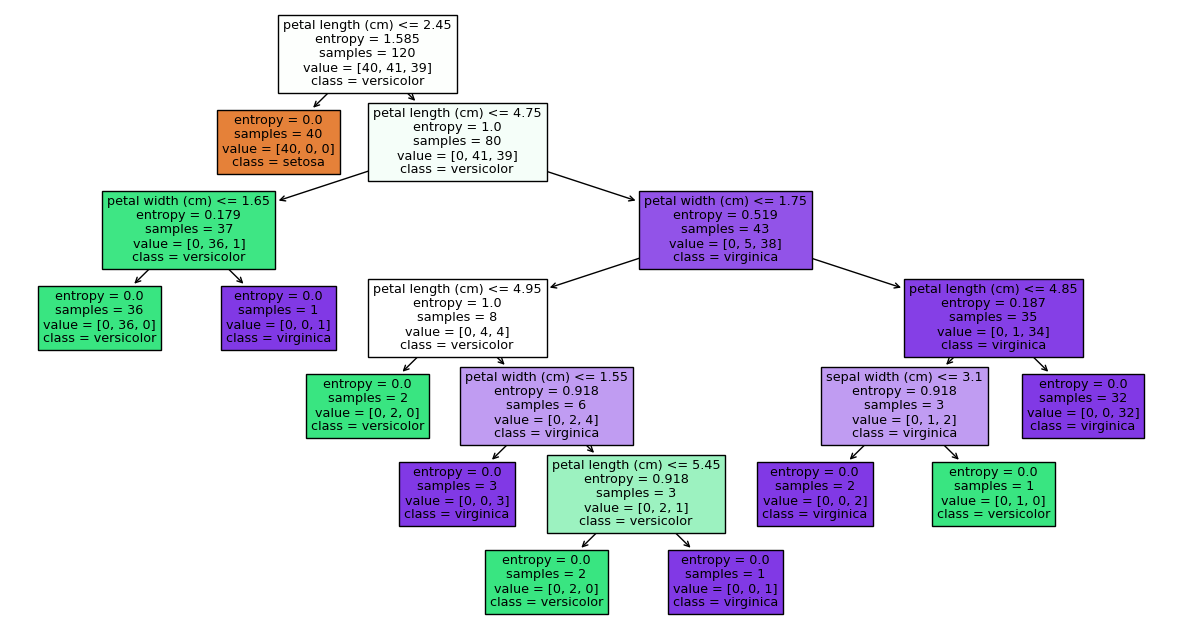

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# STEP 1: Train the full tree (no pruning)
clf_full = DecisionTreeClassifier(
    criterion="entropy",     # closer to C4.5
    random_state=42
)
clf_full.fit(X_train, y_train)

print("Accuracy before pruning:", clf_full.score(X_test, y_test))

# STEP 2: Get effective alphas for pruning
path = clf_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# STEP 3: Train trees for different alphas
clfs = []
for ccp in ccp_alphas:
    clf = DecisionTreeClassifier(
        criterion="entropy",
        random_state=42,
        ccp_alpha=ccp
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)

# STEP 4: Pick best pruned tree (highest test accuracy)
test_scores = [clf.score(X_test, y_test) for clf in clfs]
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]
best_clf = clfs[test_scores.index(max(test_scores))]

print("Best ccp_alpha:", best_alpha)
print("Accuracy after pruning:", best_clf.score(X_test, y_test))

# STEP 5: Plot pruned tree
plt.figure(figsize=(15, 8))
plot_tree(
    best_clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.show()

